In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load the diabetes dataset
diabetes_file_path = 'diabetes.csv'
diabetes_data = pd.read_csv(diabetes_file_path)

In [4]:
# Extract features and target
X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']


In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [7]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

Explained variance ratio: [0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


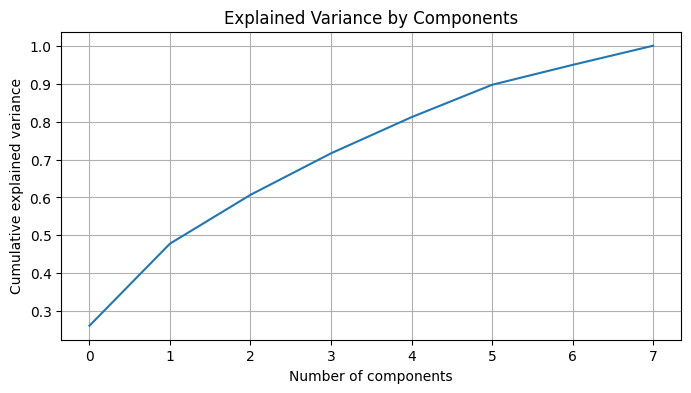

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

In [9]:
# Apply PCA
pca = PCA(n_components=5)  # Reduce to 5 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [11]:
# Train and evaluate SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)

In [12]:
# Train and evaluate Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

In [13]:
# Print results
svc_report = classification_report(y_test, svc_predictions)
logreg_report = classification_report(y_test, logreg_predictions)

In [14]:
print("SVC Accuracy:", svc_accuracy)

print("Logistic Regression Accuracy:", logreg_accuracy)


SVC Accuracy: 0.7207792207792207
Logistic Regression Accuracy: 0.7272727272727273


In [ ]:
# in this case both models performed worse, but since we made a significant reduction on
# hardware usage, it may be a viable option